### Load excel from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Data Source = https://ucdavis.app.box.com/folder/148930760208?utm_campaign=collab+auto%20accept%20user&utm_medium=email&utm_source=trans
# Read excel and rename Columns
xls = pd.ExcelFile('/content/drive/MyDrive/bst227 project/AlleleB.xlsx')
df = pd.read_excel(xls, 'VAST and brain measurements', header=0)
df.columns=['Fish ID', 'Experiment Number', 'Plate', 'ID', 'Genotype', 'Dechorionation']
df = df.iloc[1:, :]

In [3]:
df

,Fish ID,Experiment Number,Plate,ID,Genotype,Dechorionation
1,A01,1,1.1,1_1.1_A01,het,Natural
2,A03,1,1.1,1_1.1_A03,?,Natural
3,A06,1,1.1,1_1.1_A06,hom,Natural
4,A08,1,1.1,1_1.1_A08,?,Natural
5,A09,1,1.1,1_1.1_A09,?,Natural
...,...,...,...,...,...,...
371,E10,2,2.2,2_2.2_E10,wt,Natural
372,F02,2,2.2,2_2.2_F02,wt,Natural
373,F03,2,2.2,2_2.2_F03,wt,Natural
374,H06,2,2.2,2_2.2_H06,wt,Natural


In [4]:
print(df["Plate"].unique())
print(df["Experiment Number"].unique())
print(df[df["Experiment Number"] == 1]["Plate"].unique())
print(df[df["Experiment Number"] == 2]["Plate"].unique())
#There are two plates and two experiments

print(df["Genotype"].unique())
# Four types of genotype in each experiment each plate

[1.1 1.2 2.1 2.2]
[1 2]
[1.1 1.2]
[1.1 2.1 1.2 2.2]
['het' '?' 'hom' 'wt']


### Load images

In [5]:
import cv2
import os

def load_images_from_folder(f):

    images = {}
    for file_name in tqdm(os.listdir(f)):
        
        img = cv2.imread(os.path.join(f, file_name))
        if img is not None:
          images[file_name[-12:-5]] = img  # Store key name of images files
          
    return images

In [6]:
# Allele B
img_e1_p11 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.19_TH324a_AlleleB')
img_e1_p12 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.21_TH324a_AlleleB')
#two plates for experiment and four plates for experiment 2

img_e2_p11 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleB_Plate1')
img_e2_p12 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleB_Plate1_5dpf')
img_e2_p21 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleB_Plate2')
img_e2_p22 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleB_Plate2_5dpf')

100%|██████████| 260/260 [00:04<00:00, 55.02it/s]


In [ ]:
# Allele C 4 plates per experiment
img_e1_p11_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.19_TH324b_AlleleC_Plate1')
img_e1_p12_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.21_TH324b_AlleleC_Plate1')
img_e1_p21_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.19_TH324b_AlleleC_Plate2')
img_e1_p22_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.21_TH324b_AlleleC_Plate2')

img_e2_p11_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleC_Plate1')
img_e2_p12_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleC_Plate1_5dpf')
img_e2_p21_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleC_Plate2')
img_e2_p22_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleC_Plate2_5dpf')

img_e3_p11_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.23_TH324b_AlleleC_Plate1')
img_e3_p12_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.25_TH324b_AlleleC_Plate1')
img_e3_p21_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.23_TH324b_AlleleC_Plate2')
img_e3_p22_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.25_TH324b_AlleleC_Plate2')

 64%|██████▍   | 229/356 [00:03<00:01, 64.48it/s]


KeyboardInterrupt: ignored

### Create datasets and assign labels

In [7]:
# Confirm all images has been loaded
print(len(img_e1_p11) + len(img_e1_p12), df[df['Experiment Number']==1].shape[0]*4)
print(len(img_e2_p11) + len(img_e2_p12) + len(img_e2_p21) + len(img_e2_p22), df[df['Experiment Number']==2].shape[0]*4)

228 224
1276 1276


In [8]:
def create_dataset(lables, imgs, exp, plate, assign=True):

  fish = {}
  category = {'wt': 0, 'het': 1, 'hom': 2, '?': 3}
  shape = next(iter(imgs.values())).shape
  m = int(len(imgs) / 4)
  X = np.zeros((m, 4, shape[0], shape[1], shape[2]))
  y = np.zeros((m, 1))

  i = 0
  for fn in imgs.keys(): #fn is the fish id and the plate
    fish_id = fn[0:3] # first three characters are the fish id
    if fish_id not in fish: 
      fish[fish_id] = i # add the fish id
      i += 1  #count number of images of the fish
 
    index = int(fn[-1]) - 1 
    id = '{}_{}_{}'.format(exp, plate, fish_id)
    
    X[fish[fish_id], index] = imgs[fn]

    if assign:
      try:
        y[fish[fish_id]] = category[df[df['ID']==id]['Genotype'].values[0]]
      except:
        y[fish[fish_id]] = 3
    else:
      #y = np.ones((m, 1))*3
      return X

  return X, y

In [9]:
'''
For Allele B data,
there is no label for fish 1_1.2_A11, but we still have images of this fish. 
Code:
  d = df.loc[df['Experiment Number'] == 1]
  id = list(d.loc[d['Plate'] == 1.2]['Fish ID'])
  'A11' in id
'''

X_e1_p11, y_e1_p11 = create_dataset(df, img_e1_p11, 1, '1.1')
X_e1_p12, y_e1_p12 = create_dataset(df, img_e1_p12, 1, '1.2')

X_e2_p11, y_e2_p11 = create_dataset(df, img_e2_p11, 2, '1.1')
X_e2_p12, y_e2_p12 = create_dataset(df, img_e2_p12, 2, '1.2')
X_e2_p21, y_e2_p21 = create_dataset(df, img_e2_p21, 2, '2.1')
X_e2_p22, y_e2_p22 = create_dataset(df, img_e2_p22, 2, '2.2')

print(y_e1_p11.shape[0] + y_e1_p12.shape[0] + y_e2_p11.shape[0] + y_e2_p12.shape[0] + y_e2_p21.shape[0] + y_e2_p22.shape[0])
print(df.shape[0]) # It misses one row entry of fish 1_1.2_A11

376
375


In [10]:
y_train_b = np.concatenate((y_e1_p11, y_e1_p12, y_e2_p11, y_e2_p12))
y_test_b = np.concatenate((y_e2_p21, y_e2_p22))

np.save('y_train_b.npy', y_train_b)
np.save('y_test_b.npy', y_test_b)


In [11]:
X_train_b = np.concatenate((X_e1_p11, X_e1_p12, X_e2_p11, X_e2_p12))
X_test_b = np.concatenate((X_e2_p21, X_e2_p22))

np.save('X_train_b.npy', y_train_b)
np.save('X_test_b.npy', y_test_b)
del X_e1_p11,X_e1_p12,X_e2_p11,X_e2_p12,X_e2_p21,X_e2_p22

In [ ]:
# For Allele C data

X_e1_p11_c = create_dataset(df, img_e1_p11_c, 1, '1.1', assign=False)
X_e1_p12_c = create_dataset(df, img_e1_p12_c, 1, '1.2', assign=False)
X_e1_p21_c = create_dataset(df, img_e1_p21_c, 1, '2.1', assign=False)
X_e1_p22_c = create_dataset(df, img_e1_p22_c, 1, '2.2', assign=False)

X_e2_p11_c = create_dataset(df, img_e2_p11_c, 2, '1.1', assign=False)
X_e2_p12_c = create_dataset(df, img_e2_p12_c, 2, '1.2', assign=False)
X_e2_p21_c = create_dataset(df, img_e2_p21_c, 2, '2.1', assign=False)
X_e2_p22_c = create_dataset(df, img_e2_p22_c, 2, '2.2', assign=False)

X_e3_p11_c = create_dataset(df, img_e3_p11_c, 3, '1.1', assign=False)
X_e3_p12_c = create_dataset(df, img_e3_p12_c, 3, '1.2', assign=False)
X_e3_p21_c = create_dataset(df, img_e3_p21_c, 3, '2.1', assign=False)
X_e3_p22_c = create_dataset(df, img_e3_p22_c, 3, '2.2', assign=False)

In [ ]:
X_train_c1 = np.concatenate(())

ValueError: ignored

In [ ]:
del X_e3_p11_c,X_e3_p12_c,X_e3_p21_c,X_e3_p22_c

NameError: ignored

In [ ]:
X_train_c = np.concatenate((X_e1_p11_c, X_e1_p12_c, X_e1_p21_c, X_e1_p22_c))

In [ ]:
del X_e1_p11_c,X_e1_p12_c,X_e1_p21_c,X_e1_p22_c

In [ ]:
X_train_c = np.concatenate((X_train_c, X_e2_p11_c, X_e2_p12_c, X_e2_p21_c, X_e2_p22_c))

In [ ]:
del X_e2_p11_c,X_e2_p12_c,X_e2_p21_c,X_e2_p22_c

In [ ]:
np.save('drive/MyDrive/Colab Notebooks/bst227 project/X_train_c1.npy', X_train_c1)
np.save('drive/MyDrive/Colab Notebooks/bst227 project/X_train_c2.npy', X_train_c2)

In [ ]:
X_train_c1 = np.load('drive/MyDrive/Colab Notebooks/bst227 project/X_train_c1.npy')

In [ ]:
X_train_c2 = np.load('drive/MyDrive/Colab Notebooks/bst227 project/X_train_c2.npy')

FileNotFoundError: ignored

In [ ]:
X_train_c_a3 = np.concatenate((X_train_c1[:, 2, :, :, :], X_train_c2[:, 2, :, :, :]))
np.save('drive/MyDrive/Colab Notebooks/bst227 project/X_train_c_a3.npy', X_train_c_a3)
del X_train_c_a3

In [ ]:
X_train_c_a4 = np.concatenate((X_train_c1[:, 3, :, :, :], X_train_c2[:, 3, :, :, :]))
np.save('drive/MyDrive/Colab Notebooks/bst227 project/X_train_c_a4.npy', X_train_c_a4)
del X_train_c_a4

### Plot examples

In [12]:
# Plot examples
import matplotlib.pyplot as plt
def plot_fish(img, index):
  plt.figure(figsize=(432, 288))
  f, axarr = plt.subplots(4) 

  axarr[0].imshow(X_train_b[index, 0]/255)
  axarr[1].imshow(X_train_b[index, 1]/255)
  axarr[2].imshow(X_train_b[index, 2]/255)
  axarr[3].imshow(X_train_b[index, 3]/255)
  #plt.title(y_e1_p11[index])
  plt.show()

<Figure size 31104x20736 with 0 Axes>

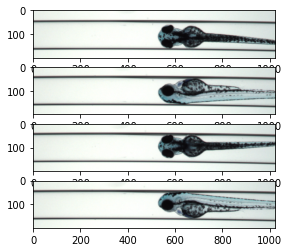

<Figure size 31104x20736 with 0 Axes>

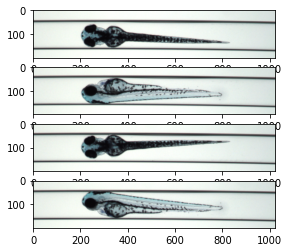

<Figure size 31104x20736 with 0 Axes>

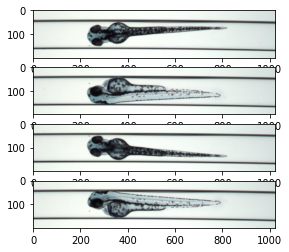

<Figure size 31104x20736 with 0 Axes>

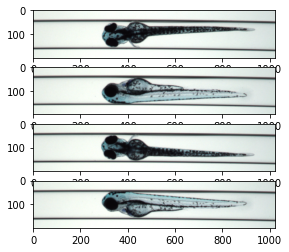

In [13]:
import matplotlib.pyplot as plt

plot_fish(X_train_b, 0)
plot_fish(X_train_b, 1)
plot_fish(X_train_b, 2)
plot_fish(X_train_b, 3)

### Transfer Learning

In [14]:
import numpy as np

In [15]:
import tensorflow as tf
X_train_b = X_train_b / 255.0
X_test_b = X_test_b / 255.0

In [16]:
X_train_b = X_train_b[np.where(y_train_b != 3)[0]] #taking all the data with genotype != ?
y_train_b = y_train_b[np.where(y_train_b != 3)[0]] #taking all the data with genotype != ?
X_test_b = X_test_b[np.where(y_test_b != 3)[0]] #taking all the data with genotype != ?
y_test_b = y_test_b[np.where(y_test_b != 3)[0]] #taking all the data with genotype != ?

In [101]:
import tensorflow as tf
from tensorflow.keras import*
from tensorflow.keras.layers import*

class Classifier(tf.keras.Model):
  def __init__(self, backbone = 'resnet'):
    super(Classifier, self).__init__()
    if backbone == "resnet":
      self.encoder = tf.keras.applications.VGG16(
      include_top=False, input_shape=(200, 1024, 3))

    self.data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])


    self.linearlayer = Sequential([Conv2D(1024,(3,2),(2,2)),
                                   Conv2D(1024,(1,2),(2,2)),
                                   Conv2D(1024,(1,2),(2,2)),
                                   Conv2D(1024,(1,4),(2,2)),
                                   Dense(256, activation = tf.nn.relu)])

    self.classifier = Sequential([Flatten(),
                                  Dense(512, activation = tf.nn.relu),
                                  Dense(256, activation = tf.nn.relu),
                                  Dense(128, activation = tf.nn.relu),
                                  Dense(32, activation = tf.nn.relu),
                                  Dense(3, activation = 'softmax')])
    
  def call(self, data):

    x1 =data[:,0,:,:]
    x2 =data[:,1,:,:]
    x3 = data[:,2,:,:]
    x4 = data[:,3,:,:]

    encodings1 = self.linearlayer(self.encoder(x1))
    encodings2 = self.linearlayer(self.encoder(x2))
    encodings3 = self.linearlayer(self.encoder(x3))
    encodings4 = self.linearlayer(self.encoder(x4))

    encodings = tf.concat([encodings1,encodings2,encodings3,encodings4],axis=1)
    predictions = self.classifier(encodings)
    return predictions
    

In [114]:
model(tf.constant(0,shape=(2,4,200,1024,3)))
model.linearlayer.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (2, 2, 16, 1024)          3146752   
                                                                 
 conv2d_31 (Conv2D)          (2, 1, 8, 1024)           2098176   
                                                                 
 conv2d_32 (Conv2D)          (2, 1, 4, 1024)           2098176   
                                                                 
 conv2d_33 (Conv2D)          (2, 1, 1, 1024)           4195328   
                                                                 
 dense_120 (Dense)           (2, 1, 1, 256)            262400    
                                                                 
Total params: 11,800,832
Trainable params: 11,800,832
Non-trainable params: 0
_________________________________________________________________


In [115]:
model = Classifier()

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      0.0001,
      decay_steps=200,
      decay_rate=0.1,
      staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [106]:
y_train_b = np.concatenate([y_train_b,y_test_b])

In [116]:
model.fit(X_train_b, y_train_b, epochs=10, batch_size=8,validation_split=0.1)

Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
X_test_b.shape

(102, 4, 200, 1024, 3)

In [ ]:
model2.fit(X_train_b[:, 1, :, :], y_train_b, epochs=10, batch_size=183)

Epoch 1/10
1/1 [==============================] - 24s 24s/step - loss: 1.0969 - accuracy: 0.5519
Epoch 2/10
1/1 [==============================] - 24s 24s/step - loss: 1.0966 - accuracy: 0.5519
Epoch 3/10
1/1 [==============================] - 25s 25s/step - loss: 1.0962 - accuracy: 0.5519
Epoch 4/10
1/1 [==============================] - 24s 24s/step - loss: 1.0959 - accuracy: 0.5519
Epoch 5/10


In [ ]:
model2.fit(X_train_b[:, 2, :, :], y_train_b, epochs=10, batch_size=183)

In [ ]:
model2.fit(X_train_b[:, 3, :, :], y_train_b, epochs=10, batch_size=183)

In [ ]:
model.fit(X_train_b[:, 0, :, :], y_train_b, epochs=10, batch_size=183)

In [ ]:
model.fit(X_train_b[:, 1, :, :], y_train_b, epochs=10, batch_size=183)

In [ ]:
model.fit(X_train_b[:, 2, :, :], y_train_b, epochs=10, batch_size=183)

In [ ]:
model.fit(X_train_b[:, 3, :, :], y_train_b, epochs=10, batch_size=183)

### Semi-supervised Learning